### Demonstrate that uniformly distributed times translate to exponentially distributed time intervals

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

##### Simulate uniformly distributed times.

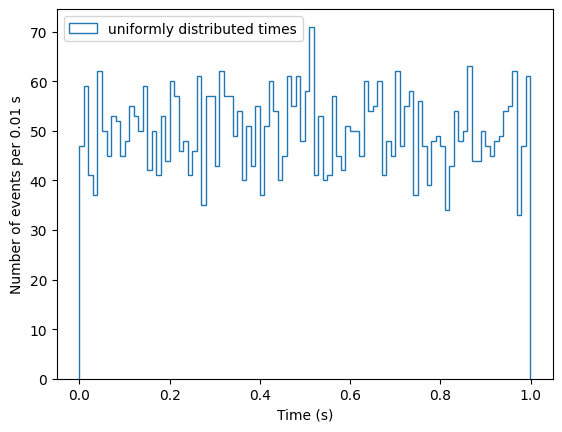

In [3]:
def expo_decay(x, N, tau):
    return N/tau * np.exp(-x/tau)

# simulate n_times events uniformly distributed in time
n_times = 5000
times = np.random.uniform(0, 1, n_times)

# plot the histogram
plt.hist(times, bins=100, histtype='step', label='uniformly distributed times')
plt.xlabel('Time (s)')  
plt.ylabel('Number of events per 0.01 s')
plt.legend()
plt.show()

### Now extract distribution of time intervals. Consider successive times. Fit exponential to distribution.

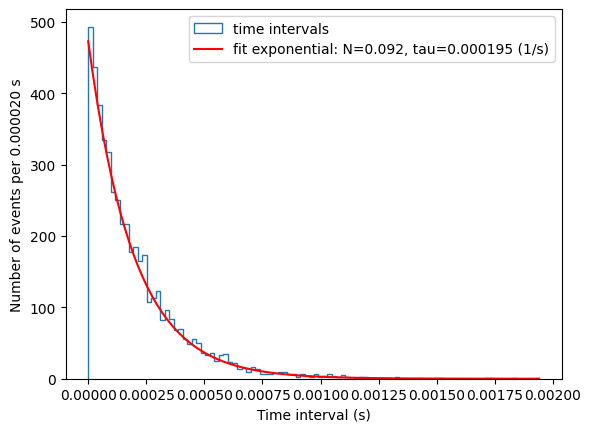

In [4]:
# now build distribution of time intervals between events
time_intervals = np.diff(np.sort(times)) #expect a tau ~1/n_times
plt.hist(time_intervals, bins=100, histtype='step',label='time intervals')

# fit an exponential decay to the histogram
bin_centers = np.linspace(0, max(time_intervals), 100)
time_interval_units = np.diff(bin_centers)[0]
popt, pcov = curve_fit(expo_decay, bin_centers, np.histogram(time_intervals, bins=100)[0])

#plot the fit
plt.plot(bin_centers, expo_decay(bin_centers, *popt), 'r-', label='fit exponential: N=%5.3f, tau=%5.6f (1/s)' % tuple(popt))
plt.xlabel('Time interval (s)')  
plt.ylabel(f'Number of events per {time_interval_units:.6f} s')
plt.legend()
plt.show()

### This result can be demonstrated mathematically by evaluating the probability distribution of the first occurence time.